# <span style="color:Brown">World Happiness Report

# <span style="color:green">Project Description    
    
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


What is Dystopia?                        
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia


What are the residuals?                     
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries


What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?               
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.              
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.               
The Dystopia Residual is already provided in the dataset.                               
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


You need to predict the happiness score considering all the other factors mentioned in the dataset

<span style="color:purple">****We have to predict Happiness score. Happiness score is our target variable and continious in nature .It is clearly a Regression problem which scaled from (0-10)score  .**** 

<span style="color:red">****# Importing Necessary Libraries****

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [87]:
print(f'The rows and columns in the dataset:{df.shape}')
print(f'\n The columns in the dataset:{df.columns}')

The rows and columns in the dataset:(158, 12)

 The columns in the dataset:Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [88]:
#setting "Happiness Rank" as Dataframe Object 
df.set_index('Happiness Rank',inplace =True)

In [90]:
# getting all information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(2)
memory usage: 14.8+ KB


<span style="color:BLUE">Observation -There are three data types of present in  dataset:(object,float64,int64)               
<span style="color:blue">Observation - No null values are present in any column but there is possibility of "blankspace" or "whitespace" .                    
Lets check with value count.    

In [91]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int6

<span style="color:blue">Observation - "blankspace" or "whitespace" are not present in any column.

In [92]:
#checking number of unique value in each column
df.nunique().to_frame("No. of unique value")

,No. of unique value
Country,158
Region,10
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157
Generosity,158


In [93]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df.duplicated().sum())

Total Dublicate rows are: 0


In [94]:
#Statistical summary of numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


<span style="color:BLUE">Observation -From the above description , we can observe the following things:                 
    .)No missing values & negative values are present in dataset                      
    .)The mean value is almost equal to  median(50%) in all column ,which means data is normally distributed.   
     .)There is minimal difference in 75% and max value,it means Outliers are present in the dataset.

In [95]:
#Seperating Numerical and Categorical column

#checking for Categorical column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical_column",categorical_col)
print("\n")

#checking for Numerical column
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical_column",numerical_col)

categorical_column ['Country', 'Region']


Numerical_column ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


<span style="color:black">****Data Visualization****

<span style="color:red">Checking Relationship

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

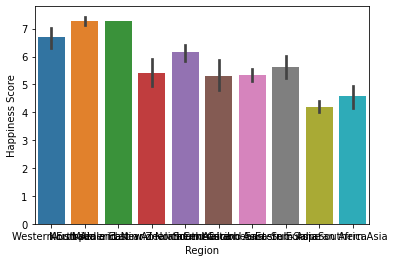

In [96]:
sns.barplot(x="Region",y="Happiness Score",data=df)

<span style="color:blue">Observation -"Region" has no relationship with Happiness Score.

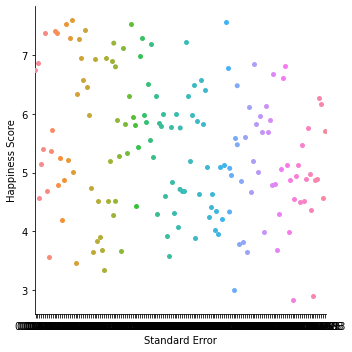

In [97]:
sns.catplot(x="Standard Error",y="Happiness Score",data=df)

<span style="color:blue">Observation -"Standard Error" has no relationship with Happiness Score.

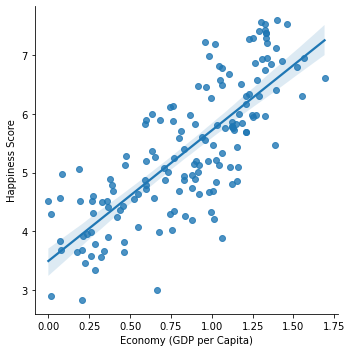

In [98]:
sns.lmplot(x="Economy (GDP per Capita)",y="Happiness Score",data=df)

<span style="color:blue">Observation -"Economy (GDP per Capita)" has a linear relationship with Happiness Score.

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

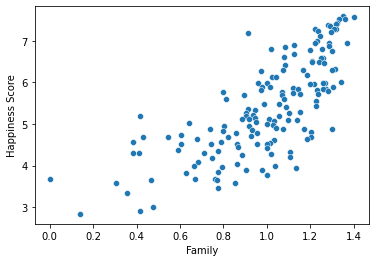

In [99]:
sns.scatterplot(x="Family",y="Happiness Score",data=df)

<span style="color:blue">Observation - Size of "Family" increases with Happiness Score and has a linear relationship

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

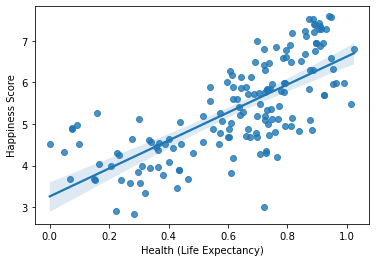

In [100]:
sns.regplot(x="Health (Life Expectancy)",y="Happiness Score",data=df)

<span style="color:blue">Observation -"Health (Life Expectancy)" has linear relationship with "Happiness Score"

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

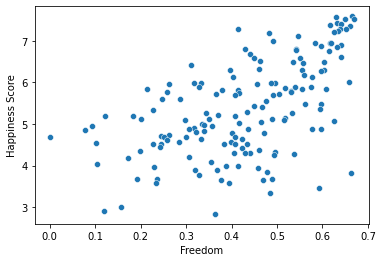

In [101]:
sns.scatterplot(x="Freedom",y="Happiness Score",data=df)

<span style="color:blue">Observation -"Freedom" has linear relationship with "Happiness Score"

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

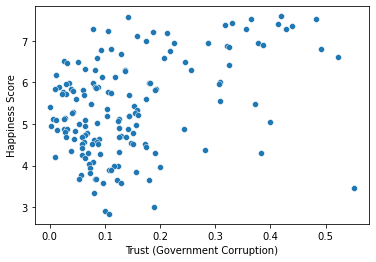

In [102]:
sns.scatterplot(x="Trust (Government Corruption)",y="Happiness Score",data=df)

<span style="color:blue">Observation -Most of the data points are concentrated behind 0.2 on X-axis , hence no relationship with HappinessScore.

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

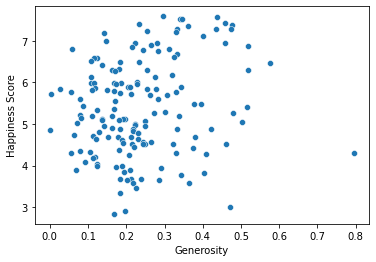

In [103]:
sns.scatterplot(x="Generosity",y="Happiness Score",data=df)

<span style="color:blue">Observation -Most of the data points are scattered everywhere , hence no relationship with HappinessScore.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

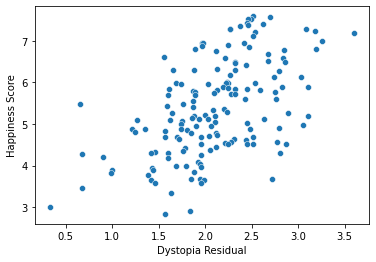

In [104]:
sns.scatterplot(x="Dystopia Residual",y="Happiness Score",data=df)

<span style="color:blue">Observation -There is not significantly relation between Dystopia Residual and HappinessScore.

 <span style="color:red">****Checking for outliers****

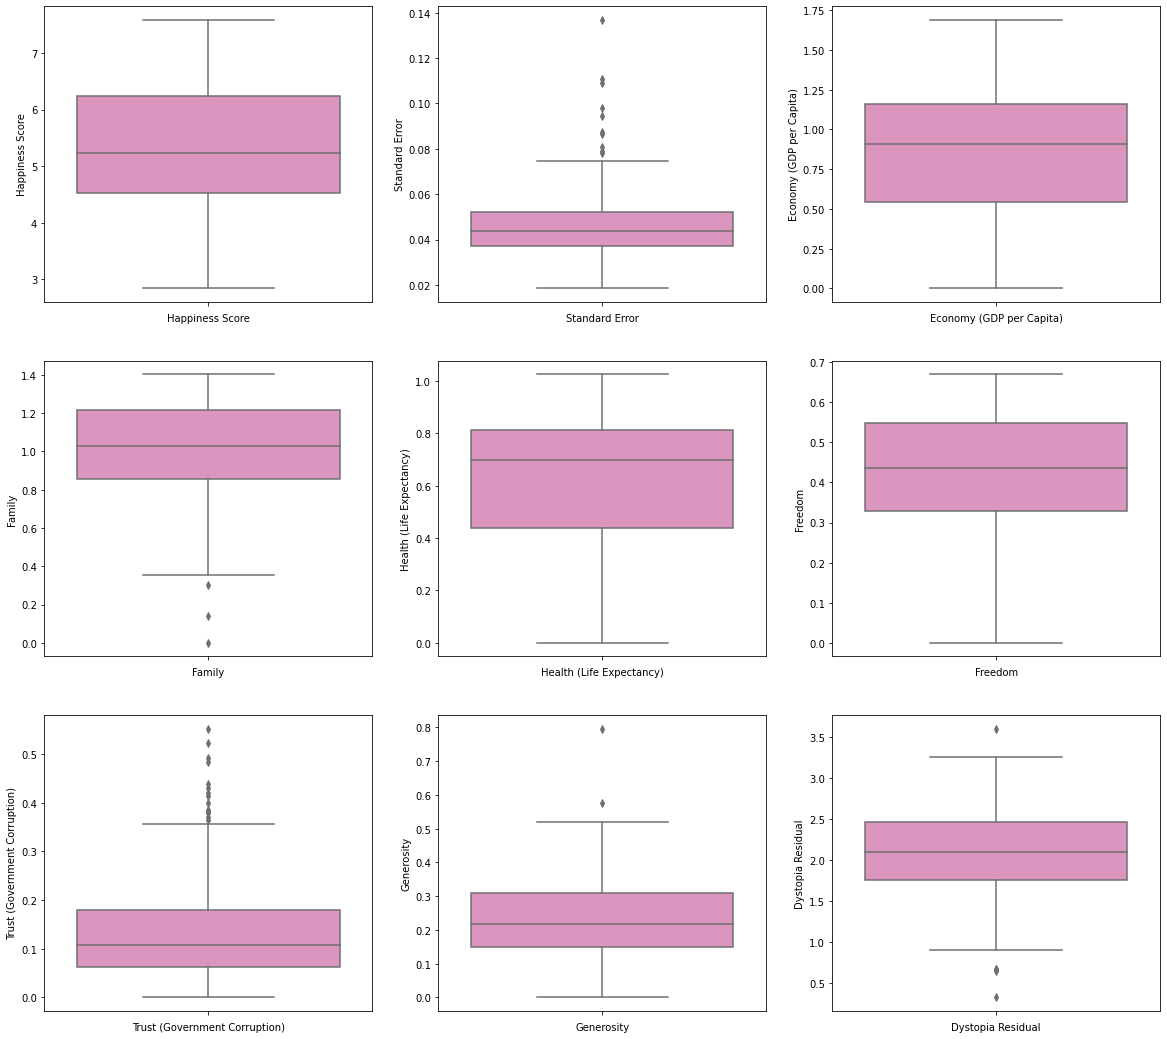

In [105]:
#checking outliers by using Boxplot
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=11:
        plt.subplot(4,3,p)
        sns.boxplot(y=df[i], palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

<span style="color:BLUE">Observation -Outliers are mostly present in 'Standard Error', and 'Trust (Government Corruption)'.So we are removing the outliers by zscore or IQR technique before bulding the model and select the best one.

# Removing Outliers

<span style="color:red">1st Method: IQR (Inter Quantile Method)

In [106]:
#1st Quantile
q1=df.quantile(0.25)

#3rd Quantile
q3=df.quantile(0.75)

#calculating IQR
iqr=q3-q1

df1=df[~((df < (q1 - 1.5*iqr ))|(df > (q3 + 1.5*iqr ))).any(axis=1)]

In [107]:
print("New Dataframe after IQR : " ,df1.shape)

New Dataframe after IQR :  (126, 11)


In [108]:
print("Data Loss Percentage  with IQR method :",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage  with IQR method : 20.253164556962027


<span style="color:blue">Obsevation-Accepted Data Loss Percentage is below 10% but here it goes 20.25% which is not acceptable. Lets check with other method (z-score) 

<span style="color:red">2nd Method: Z score

In [109]:
from scipy.stats import zscore
outliers_feature=df[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']]
z=np.abs(zscore(outliers_feature)) #.abs() to remove negative values
z

,Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,
1,0.805926,1.320281,2.309652,0.471040,0.758258
2,0.055889,1.514458,0.016480,1.575856,1.092857
3,0.854487,1.361054,2.842774,0.824293,0.712335
4,0.531526,1.251922,1.852081,0.868638,0.663893
5,0.722845,1.221204,1.555725,1.748563,0.639337
...,...,...,...,...,...
154,0.774917,0.800520,3.413922,0.087228,2.588925
155,0.662582,2.346860,0.529210,0.433117,0.843967
156,0.132534,1.901086,0.381419,1.856891,3.208430


<span style="color:GREEN">In normal distribution, it is estimated that                     
68% of the data points lie between +/- 1 standard deviation.                                
95% of the data points lie between +/- 2 standard deviation                              
99.7% of the data points lie between +/- 3 standard deviation   

In [110]:
#Z-score>3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([2, 0, 0, 0, 3, 1, 2, 4, 1], dtype=int64))

In [111]:
#now removing the data above zscore and creating a new dataframe
df2=df[(z<3).all(axis=1)]
print("New Dataframe having rows and column: " ,df2.shape)


New Dataframe having rows and column:  (149, 11)


In [112]:
#shape of old and new dataframe
print("OLd Dataframe : " ,df.shape[0])
print("New Dataframe : " ,df2.shape[0])

OLd Dataframe :  158
New Dataframe :  149


In [113]:
print("Data Loss Percentage with Z-score method:",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage with Z-score method: 5.69620253164557


<span style="color:green">Conclusion -Data Loss Percentage  with IQR method is very high as compared with Z-score . So i go with z-score 

In [114]:
#Storing Dataframe with Z-score method in old dataframe
df=df2

In [115]:
#Reset the index of dataframe
df = df.reset_index(drop=True)
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
144,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
145,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
146,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
147,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# <span style="color:red">Checking for Skewness

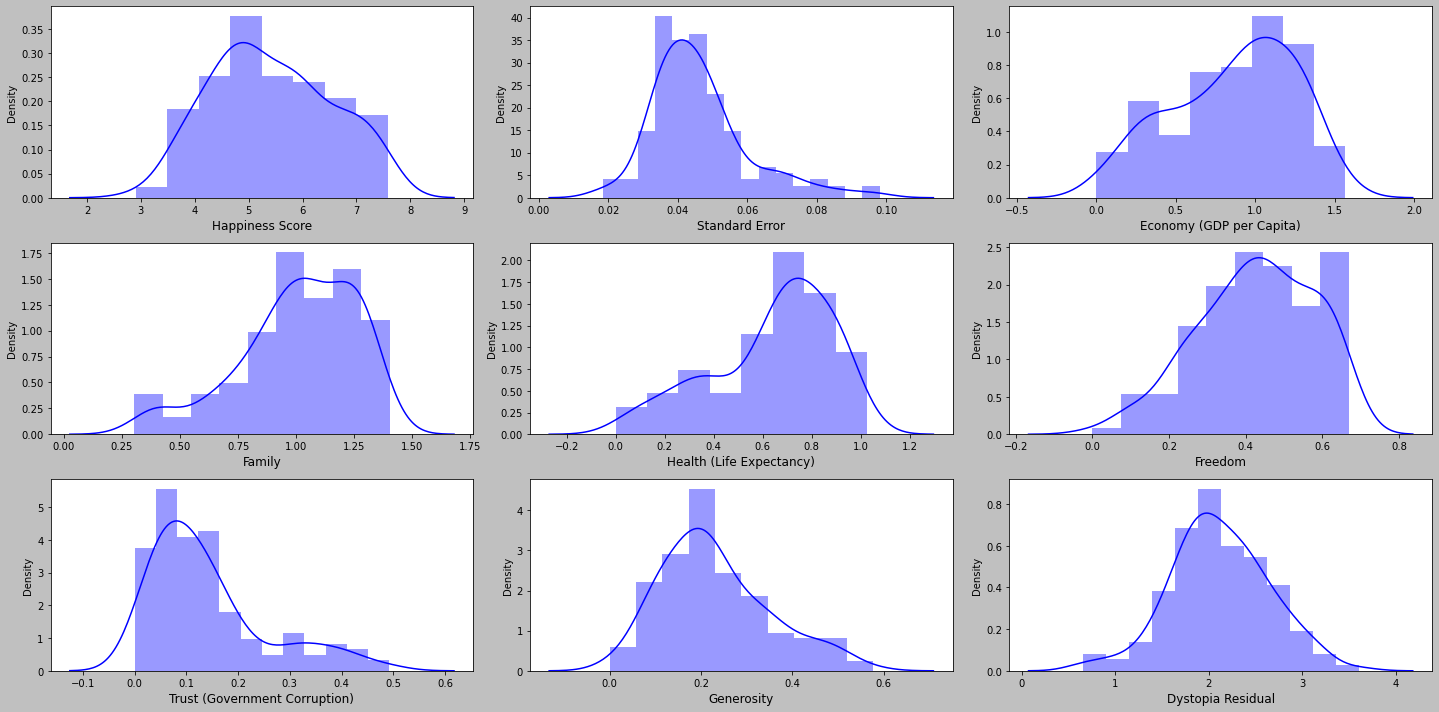

In [116]:
#Checking for data distribution in numerical columns
plt.figure(figsize = (20,10), facecolor = 'silver')
plotnumber = 1 #this is an initiator

for column in numerical_col:
    if plotnumber <=9: #here 9 is the number of numerical features
        ax = plt.subplot (3,3, plotnumber)
        sns.distplot (df [column],color='b')
        plt.xlabel (column, fontsize =12)
    plotnumber +=1
plt.tight_layout()

<span style="color:blue">Observation - From the above distribution plots, we can notice that data almost looks normal except . 
 we do not remove skewness and do not detect outliers from the target variable i.e "happiness score "

In [117]:
df.skew() #Default Acceptable range of Skewnesss is (-0.5 to 0.5)

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

<span style="color:red">Removing Skwewness

In [118]:
#Removing Skewness using cuberoot method
df["Standard Error"]=np.cbrt(df["Standard Error"])
df["Trust (Government Corruption)"]=np.cbrt(df["Trust (Government Corruption)"])

In [119]:
df.skew()

Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

<span style="color:blue">Observation - From the above data, we can notice that no column have high skewness.

<span style="color:red">****Correlation between target variable and Independent variable****

In [120]:
#checking Correlation 
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.237228,0.773577,0.720868,0.729191,0.585066,0.394775,0.250903,0.528334
Standard Error,-0.237228,1.000000,-0.244856,-0.129305,-0.343251,-0.202292,-0.095125,-0.155298,0.028798
Economy (GDP per Capita),0.773577,-0.244856,1.000000,0.628589,0.817470,0.376780,0.231317,0.020730,0.026936
Family,0.720868,-0.129305,0.628589,1.000000,0.503890,0.474229,0.180054,0.154011,0.118062
Health (Life Expectancy),0.729191,-0.343251,0.817470,0.503890,1.000000,0.382595,0.158670,0.129328,0.031212
Freedom,0.585066,-0.202292,0.376780,0.474229,0.382595,1.000000,0.482062,0.428718,0.058596
Trust (Government Corruption),0.394775,-0.095125,0.231317,0.180054,0.158670,0.482062,1.000000,0.241413,0.107929
Generosity,0.250903,-0.155298,0.020730,0.154011,0.129328,0.428718,0.241413,1.000000,-0.034239
Dystopia Residual,0.528334,0.028798,0.026936,0.118062,0.031212,0.058596,0.107929,-0.034239,1.000000


<AxesSubplot:>

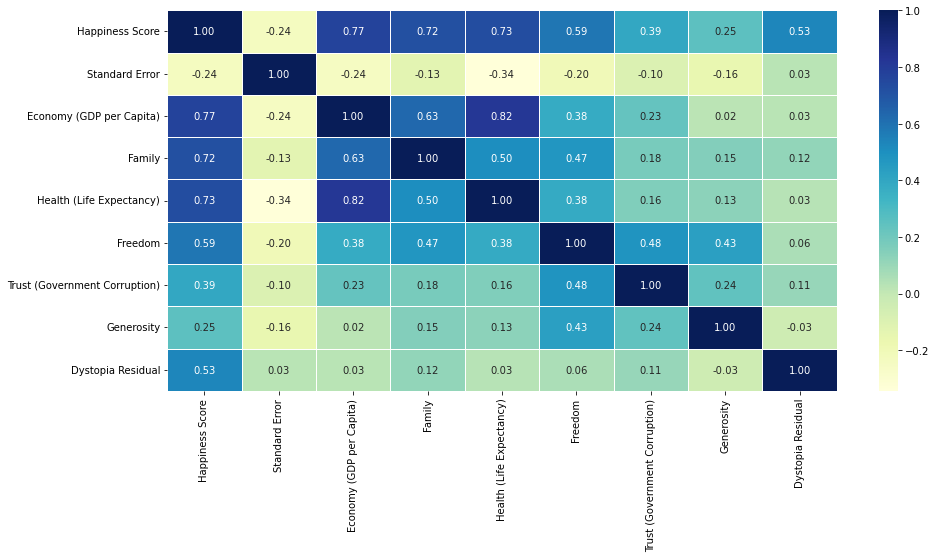

In [121]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, fmt='.2f',cmap = "YlGnBu")

<span style="color:blue">Observation - From the above plot, we can notice that 'Economy (GDP per Capita)', 'Health (Life Expectancy)' are strongly correlated.
But both are important feature to predict Happpiness score so don't drop these column. 

<span style="color:black">****Seperating Feature and Label**** 

In [136]:
#Seperating Feature and label into x and y
x=df.drop(["Happiness Score",'Country', 'Region'],axis=1)
y=df["Happiness Score"]

print("Feature Dimension :" ,x.shape)
print("Target Dimension :" ,y.shape)

Feature Dimension : (149, 8)
Target Dimension : (149,)


<span style="color:black">****Feature Scaling Using Standard Scaler****

In [137]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.911097,1.381916,1.357879,1.235390,1.583704,1.886835,0.546305,0.756876
1,0.289534,1.138324,1.567882,1.261541,1.338953,0.279412,1.713898,1.109300
2,-0.988343,1.198220,1.401974,0.962900,1.476027,2.142033,0.919630,0.708507
3,-0.496623,1.543526,1.283947,1.006023,1.611371,1.646273,0.966495,0.657485
4,-0.781797,1.200315,1.250726,1.089333,1.366887,1.477326,1.896418,0.631620
...,...,...,...,...,...,...,...,...
144,0.473095,-1.026255,-0.945943,-1.985941,0.274090,0.581308,-0.249803,-1.343100
145,-0.134003,-1.562163,-0.624365,-1.498813,-0.216276,0.161899,-0.117411,-1.252030
146,-1.223140,-1.402596,-2.811354,-1.367851,-1.285662,-0.153050,1.118051,-0.322135
147,-0.690149,-1.488379,-2.608163,-1.303594,0.379439,-0.355660,-0.409226,-0.930702


 <span style="color:red">****Detecting Multicollinearity Using a Variance Inflation Factor (VIF)****

In [138]:
#finding VIF in each scaled column i.e x_scaled.shape[1](1/1- R^2 )

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(x_scaled.values, i) for i in range(len(x_scaled.columns))]
vif["Features"] = x_scaled.columns

vif

,VIF,Features
0,1.161693,Standard Error
1,4.105092,Economy (GDP per Capita)
2,1.946484,Family
3,3.417996,Health (Life Expectancy)
4,1.930776,Freedom
5,1.380158,Trust (Government Corruption)
6,1.319227,Generosity
7,1.039449,Dystopia Residual


<span style="color:blue">Conclusion -There is no case of multicollinearity

<span style="color:black">****Split the data into training and testing sets****

In [141]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split (x_scaled, y, test_size = .30, random_state = 48)
print("Total Size Of Feature in Dataset :",x_scaled.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (149, 8)
Total Size Of Training Feature Dataset :  (104, 8)
Total Size Of Testing Feature Dataset :  (45, 8)
Total Size Of Label in Dataset : (149,)
Total Size Of Training Label Dataset :  (104,)
Total Size Of Testing Label Dataset :  (45,)


<span style="color:black">****Write one function and call as many as times to check score of different model****

In [240]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_score(model_name,x_train,x_test,y_train,y_test, train=True):
    if train: #checking training score 
        y_pred_train=model_name.predict(x_train)
        
        print("\n*********************Train Result*********************")
        
        print("R2 Score on train data:",r2_score(y_train,y_pred_train)*100)
        
    elif train==False: #checking testing score 
        y_pred_test=model_name.predict(x_test)
        
        print("\n*********************Test Result*********************")
        
        print("R2 Score on test data:",r2_score(y_test,y_pred_test)*100)
        print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_test)*100)
        print("Mean Squared Error :",mean_squared_error(y_test,y_pred_test)*100)
        print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_pred_test))*100)              

# <span style="color:red">****------------------Models--------------------****

# LinearRegression

In [241]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [242]:
#Call the function and pass datset to check train and test score 
model_score(LR,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(LR,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 99.91758117298545

*********************Test Result*********************
R2 Score on test data: 99.80023453788188
Mean Absolute Error : 2.9347572396651382
Mean Squared Error : 0.22043009193101434
Root Mean Squared Error : 4.694998316623919


# Lasso

In [243]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [244]:
#Call the function and pass datset to check train and test score 
model_score(lasso,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(lasso,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 0.0

*********************Test Result*********************
R2 Score on test data: -11.237729024142817
Mean Absolute Error : 93.55410256410256
Mean Squared Error : 122.74465553254441
Root Mean Squared Error : 110.79018708014911


# Ridge

In [245]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [246]:
#Call the function and pass datset to check train and test score 
model_score(ridge,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(ridge,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 99.91383888050213

*********************Test Result*********************
R2 Score on test data: 99.80285187229573
Mean Absolute Error : 2.995165162710782
Mean Squared Error : 0.21754200877918936
Root Mean Squared Error : 4.664139886186834


# DecisionTreeRegressor

In [247]:
from sklearn.tree import DecisionTreeRegressor
Decision_tree = DecisionTreeRegressor()
Decision_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [248]:
#Call the function and pass datset to check train and test score 
model_score(Decision_tree,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(Decision_tree,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 100.0

*********************Test Result*********************
R2 Score on test data: 68.79760584086294
Mean Absolute Error : 47.34444444444444
Mean Squared Error : 34.430108888888896
Root Mean Squared Error : 58.67717519520592


# RandomForestRegressor

In [249]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [250]:
#Call the function and pass datset to check train and test score 
model_score(random_forest,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(random_forest,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 98.35803912916111

*********************Test Result*********************
R2 Score on test data: 88.30415143545667
Mean Absolute Error : 26.923933333333327
Mean Squared Error : 12.90571927177779
Root Mean Squared Error : 35.924530994541584


# AdaBoostRegressor

In [251]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(x_train,y_train)

AdaBoostRegressor()

In [252]:
#Call the function and pass datset to check train and test score 
model_score(adaboost,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(adaboost,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 96.38991588837287

*********************Test Result*********************
R2 Score on test data: 85.52409222101475
Mean Absolute Error : 32.17024998280023
Mean Squared Error : 15.973360202874886
Root Mean Squared Error : 39.96668638112858


# Support Vector Regression (SVR)

In [253]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [254]:
#Call the function and pass datset to check train and test score 
model_score(svm,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(svm,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 99.09227349690795

*********************Test Result*********************
R2 Score on test data: 88.31383159888821
Mean Absolute Error : 22.05178462835431
Mean Squared Error : 12.89503774909364
Root Mean Squared Error : 35.90966130318363


# <span style="color:green">Out of all above models LinearRegression,Ridge perform well.

<span style="color:red">****Cross-Validation score- to check if the model is overfitting****

 Cross-Validation is a technique used to assess how well our Machine learning models perform on unseen data”

In [233]:
from sklearn.model_selection import cross_val_score

In [266]:
#Linear Regression
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(LR,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(LR,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.95292639 0.98078834 0.93953141 0.95752555 0.99262246]
Overall Cross-Validation score : 0.9646788295066264


In [265]:
#Ridge Regression
print("Cross-Validation score of each fold of Dataset:",cross_val_score(ridge,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(ridge,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.93343957 0.98139066 0.93868444 0.9546195  0.9907598 ]
Overall Cross-Validation score : 0.9597787924977592


In [264]:
#Decision tree Regressor
print("Cross-Validation score of each fold of Dataset :",cross_val_score(Decision_tree,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(Decision_tree,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset : [ -5.59486073  -9.49359616  -5.07795496 -11.56701474  -5.30444354]
Overall Cross-Validation score : -8.337055127206082


In [263]:
#RandomForestRegressor
print("Cross-Validation score of each fold of Dataset :",cross_val_score(random_forest,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(random_forest,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset : [-7.76351975 -0.74742716 -0.77459605 -2.56272503 -6.44161873]
Overall Cross-Validation score : -3.721372513894002


In [262]:
#AdaBoostRegressor
print("Cross-Validation score of each fold of Dataset-",cross_val_score(adaboost,x_scaled,y,cv=5))
print("Overall Cross-Validation score -",cross_val_score(adaboost,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset- [-10.0674736   -6.0301931   -2.37519885  -6.18131138  -8.03691681]
Overall Cross-Validation score - -6.298883208075843


In [261]:
#Support Vector Regression
print("Cross-Validation score of each fold of Dataset-",cross_val_score(svm,x_scaled,y,cv=5))
print("Overall Cross-Validation score -",cross_val_score(svm,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset- [-10.40958689   0.12051524   0.80112338  -0.19417496  -5.60935241]
Overall Cross-Validation score - -3.0582951294865994


# <span style="color:green">Conclusion-All models except LinearRegression,Ridge are overfitted

# <span style="color:black">****HyperParameter Tuning****

<span style="color:red">****HyperParameter Tuning for Linear regression****

In [296]:
from sklearn.model_selection import GridSearchCV
LR.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [297]:
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2],
    'positive': [True, False],  
}

In [298]:
grid_Search = GridSearchCV(estimator=LR,param_grid=param_grid)
grid_Search.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(positive=True),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, -1, 1, 2],
                         'positive': [True, False]})

In [299]:
#give the best parameter
grid_Search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

In [300]:
# we will use the best parameter in our Linear Regression algorithm and check if R^2 is increasing or not
LR_GS = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= None, positive= True)
LR_GS.fit(x_train,y_train)

#Call the function and pass datset to check train and test score 
model_score(LR_GS,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(LR_GS,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 99.91758117298545

*********************Test Result*********************
R2 Score on test data: 98.9118020520145
Mean Absolute Error : 10.50282962517269
Mean Squared Error : 1.200765994132366
Root Mean Squared Error : 10.957946861216138


<span style="color:red">****HyperParameter Tuning for Ridge****

In [267]:
ridge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [289]:
# Define the parameter grid
param_grid_ridge = { 'alpha': [1,0.1,0.01,0.001,0.0001,0] , 
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
     "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [291]:
Ridge_GS =GridSearchCV(estimator=ridge,param_grid=param_grid_ridge)
Ridge_GS.fit(x_train,y_train)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [292]:
#give the best parameter
Ridge_GS.best_params_

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'positive': False,
 'solver': 'sag'}

In [294]:
# we will use the best parameter in our Linear Regression algorithm and check if R^2 is increasing or not
ridge =Ridge(alpha=0.001,copy_X=True, fit_intercept=True,positive= False, solver="sag")
ridge.fit(x_train,y_train)

#Call the function and pass datset to check train and test score 
model_score(ridge,x_train,x_test,y_train,y_test, train=True) #This is training score
model_score(ridge,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
R2 Score on train data: 99.91757219717601

*********************Test Result*********************
R2 Score on test data: 98.91033746492285
Mean Absolute Error : 10.507530185432753
Mean Squared Error : 1.2023820846408617
Root Mean Squared Error : 10.965318438790831


# <span style="color:green">Conclusion-After Performing HyperParameter Tuning, score for Linear Regression, Ridge model is decreasing . it's important to understand that hyperparameter tuning is not a guarantee for always improving the model's performance.

Please note that each parameter of any algorithm has a different effect (negative or positive) on model performance and it's depend on the data, so it is not necessary that model performance will increase after hyperparameter tuning, it may also decrease.

# <span style="color:red">Report card of Linear Regression and Ridge

# <span style="color:green">Conclusion-Here we can see that Linear Regression model works the best in this dataset with score 99.80% and having more cv-score than Ridge model

# Saving Model

In [301]:
import joblib
joblib.dump(LR,'Model for World Happiness Report')

['Model for World Happiness Report']

# Model Prediction

In [303]:
Lin_model = joblib.load('Model for World Happiness Report')
Happiness_model = Lin_model.predict(x_test)
Happiness_model

array([4.98327077, 6.0761247 , 4.11362248, 4.55487891, 5.57216825,
       4.60874402, 6.96950286, 5.87344442, 6.51195991, 4.38358011,
       4.02113521, 6.44452876, 6.96965434, 5.47848182, 5.19927599,
       5.33941162, 7.35832118, 4.81516184, 5.94644509, 5.37518798,
       7.33148186, 5.21842707, 5.82661093, 3.44375528, 4.25264732,
       7.52424753, 6.58260831, 5.13441022, 4.15187981, 5.0840632 ,
       5.14586906, 4.9223109 , 4.76840553, 6.4031213 , 6.25909509,
       4.90431288, 4.40704585, 3.94704116, 4.03022563, 5.32886256,
       5.27455835, 4.72211155, 3.01502726, 4.95715476, 4.5192164 ])

In [305]:
test_data = np.array(y_test)
World_Happiness = pd.DataFrame({'predicted': Happiness_model,'original':test_data})
World_Happiness.head(10)

,predicted,original
0,4.983271,4.876
1,6.076125,6.003
2,4.113622,3.989
3,4.554879,4.436
4,5.572168,5.429
5,4.608744,4.517
6,6.969503,6.901
7,5.873444,5.833
8,6.511960,6.411
9,4.383580,4.292


# <span style="color:red">As you can see minute difference in predicted and orignal value.